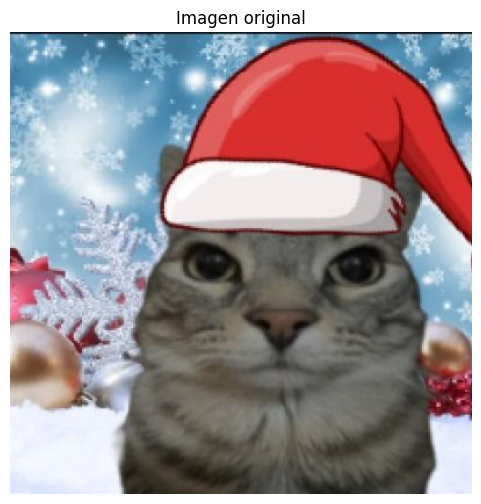

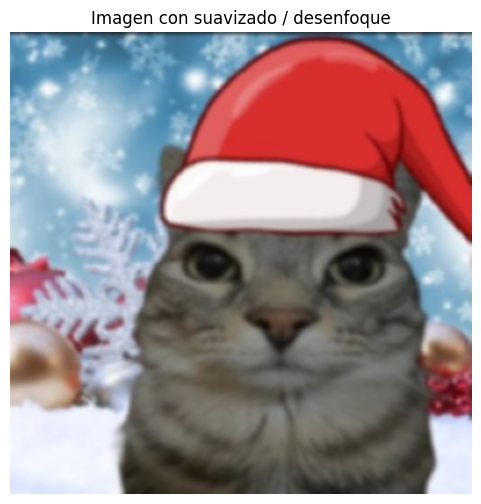

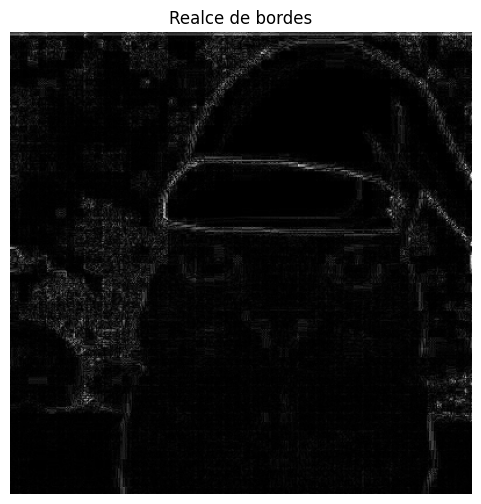

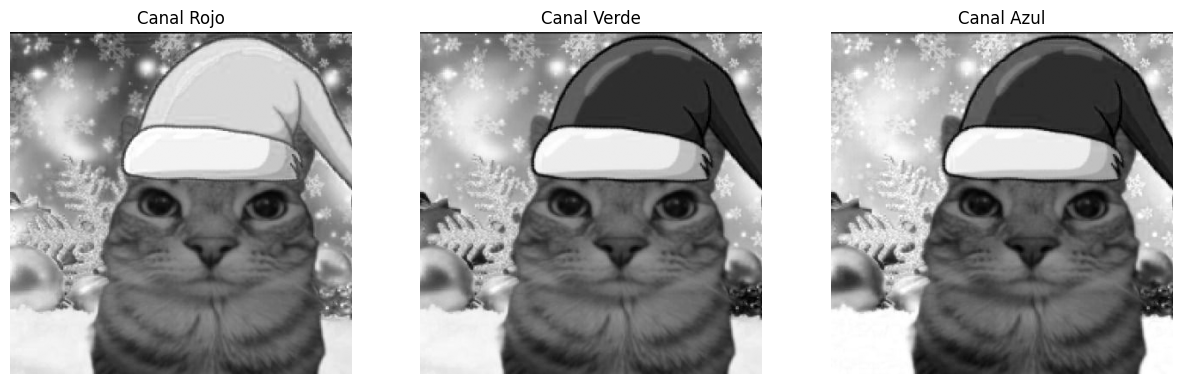

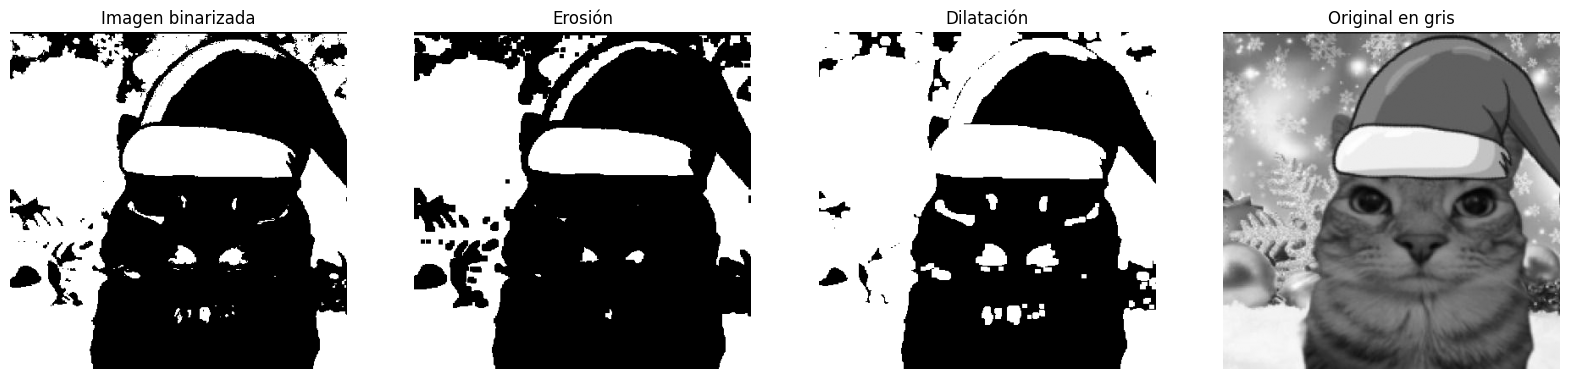

GIF guardado en: ./gifs/procesamiento_animacion.gif


In [14]:
# Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Crear carpetas si no existen
os.makedirs("python/gifs", exist_ok=True)

# ---------------------------
# 1. Carga y visualización
# ---------------------------
img_path = "./data/gato.jpg"  # Ruta de la imagen
img = cv2.imread(img_path)          # Carga la imagen en BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Imagen original")
plt.axis('off')
plt.show()

# ---------------------------
# 2. Filtros básicos
# ---------------------------

# Suavizado / Desenfoque
img_blur = cv2.GaussianBlur(img_rgb, (7,7), 0)
plt.figure(figsize=(6,6))
plt.imshow(img_blur)
plt.title("Imagen con suavizado / desenfoque")
plt.axis('off')
plt.show()
# Comentario: El suavizado reduce el ruido y los detalles finos, suavizando los bordes.

# Realce de bordes (filtro Laplaciano)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_edges = cv2.Laplacian(img_gray, cv2.CV_64F)
img_edges = cv2.convertScaleAbs(img_edges)
plt.figure(figsize=(6,6))
plt.imshow(img_edges, cmap='gray')
plt.title("Realce de bordes")
plt.axis('off')
plt.show()
# Comentario: Se destacan los contornos y bordes de la imagen, creando un efecto de dibujo.

# ---------------------------
# 3. Visualización de canales RGB
# ---------------------------
R, G, B = cv2.split(img_rgb)

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(R, cmap='gray')
axs[0].set_title("Canal Rojo")
axs[0].axis('off')

axs[1].imshow(G, cmap='gray')
axs[1].set_title("Canal Verde")
axs[1].axis('off')

axs[2].imshow(B, cmap='gray')
axs[2].set_title("Canal Azul")
axs[2].axis('off')

plt.show()
# Comentario: 
# - El canal rojo resalta zonas cálidas o pelaje rojizo.
# - El canal verde resalta vegetación u objetos verdes.
# - El canal azul resalta sombras y detalles oscuros.

# ---------------------------
# 4. Operaciones morfológicas
# ---------------------------

# Convertir a binario
_, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Erosión
kernel = np.ones((5,5), np.uint8)
img_erode = cv2.erode(img_bin, kernel, iterations=1)

# Dilatación
img_dilate = cv2.dilate(img_bin, kernel, iterations=1)

# Mostrar resultados
fig, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(img_bin, cmap='gray')
axs[0].set_title("Imagen binarizada")
axs[0].axis('off')

axs[1].imshow(img_erode, cmap='gray')
axs[1].set_title("Erosión")
axs[1].axis('off')

axs[2].imshow(img_dilate, cmap='gray')
axs[2].set_title("Dilatación")
axs[2].axis('off')

axs[3].imshow(img_gray, cmap='gray')
axs[3].set_title("Original en gris")
axs[3].axis('off')

plt.show()
# Comentario: 
# - La erosión adelgaza los objetos blancos, eliminando pequeños detalles.
# - La dilatación engrosa los objetos blancos, rellenando huecos pequeños.

# ---------------------------
# 5. Animación / GIF
# ---------------------------

frames = []

# Convertir imágenes a formato uint8 para GIF
def to_uint8(im):
    if len(im.shape)==2:
        return cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
    return im

frames.append(to_uint8(img_rgb))      # Original
frames.append(to_uint8(img_blur))     # Desenfoque fuerte
frames.append(to_uint8(img_edges))    # Bordes
frames.append(to_uint8(img_erode))    # Erosión
frames.append(to_uint8(img_dilate))   # Dilatación

gif_path = "./gifs/procesamiento_animacion.gif"
imageio.mimsave(gif_path, frames, duration=1000, loop=0)  # 1s por frame, loop infinito

print(f"GIF guardado en: {gif_path}")
